In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path



# Specify encoding when reading the CSV files
# Common encodings to try: 'latin1', 'ISO-8859-1', 'cp1252'
df = pd.read_csv('../data/raw/ai_job_dataset.csv')

df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [28]:
type(df)

pandas.core.frame.DataFrame

In [29]:
df.index

RangeIndex(start=0, stop=15000, step=1)

In [30]:
df.columns
print(df.columns)

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')


In [31]:
df.duplicated().sum()
df.isna().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [32]:
def clean_all_columns(df):
    # Import numpy for NaN values
    import numpy as np
    
    # Loop through all columns in the dataframe
    for column in df.columns:
        # Convert column to string type
        df[column] = df[column].astype(str)
        # Strip whitespace and convert to uppercase
        df[column] = df[column].str.strip().str.upper()
        # Replace column name with NaN (assuming column names might be in the data)
        df[column] = df[column].replace(column.upper(), np.nan)
        # Also replace 'NAN' string with actual NaN value
        df[column] = df[column].replace('NAN', np.nan)
    
    return df

# Clean all columns
df = clean_all_columns(df)

# Example of checking unique values in a specific column


In [33]:
print(sorted(df['job_title'].dropna().unique()))

['AI ARCHITECT', 'AI CONSULTANT', 'AI PRODUCT MANAGER', 'AI RESEARCH SCIENTIST', 'AI SOFTWARE ENGINEER', 'AI SPECIALIST', 'AUTONOMOUS SYSTEMS ENGINEER', 'COMPUTER VISION ENGINEER', 'DATA ANALYST', 'DATA ENGINEER', 'DATA SCIENTIST', 'DEEP LEARNING ENGINEER', 'HEAD OF AI', 'MACHINE LEARNING ENGINEER', 'MACHINE LEARNING RESEARCHER', 'ML OPS ENGINEER', 'NLP ENGINEER', 'PRINCIPAL DATA SCIENTIST', 'RESEARCH SCIENTIST', 'ROBOTICS ENGINEER']


In [34]:
df.columns = df.columns.str.strip().str.lower().str.replace(r'[\s/]+', '_', regex=True)

In [35]:
print(df.head())
print(df.isna().mean().round(2).sort_values(ascending=False).head(5))

    job_id              job_title salary_usd salary_currency experience_level  \
0  AI00001  AI RESEARCH SCIENTIST      90376             USD               SE   
1  AI00002   AI SOFTWARE ENGINEER      61895             USD               EN   
2  AI00003          AI SPECIALIST     152626             USD               MI   
3  AI00004           NLP ENGINEER      80215             USD               SE   
4  AI00005          AI CONSULTANT      54624             EUR               EN   

  employment_type company_location company_size employee_residence  \
0              CT            CHINA            M              CHINA   
1              CT           CANADA            M            IRELAND   
2              FL      SWITZERLAND            L        SOUTH KOREA   
3              FL            INDIA            M              INDIA   
4              PT           FRANCE            S          SINGAPORE   

  remote_ratio                                  required_skills  \
0           50         TA

In [36]:
top_roles = (
    df.groupby('job_title')               # group by job title
      .size()                             # count rows in each group
      .reset_index(name='postings')       # convert Series to DataFrame
      .sort_values(by='postings', ascending=False)
      .head(100)
)
print(top_roles)

                      job_title  postings
14  MACHINE LEARNING RESEARCHER       808
4          AI SOFTWARE ENGINEER       784
6   AUTONOMOUS SYSTEMS ENGINEER       777
13    MACHINE LEARNING ENGINEER       772
0                  AI ARCHITECT       771
12                   HEAD OF AI       765
16                 NLP ENGINEER       762
8                  DATA ANALYST       759
19            ROBOTICS ENGINEER       759
3         AI RESEARCH SCIENTIST       756
9                 DATA ENGINEER       749
2            AI PRODUCT MANAGER       743
18           RESEARCH SCIENTIST       742
17     PRINCIPAL DATA SCIENTIST       734
5                 AI SPECIALIST       728
15              ML OPS ENGINEER       725
7      COMPUTER VISION ENGINEER       724
10               DATA SCIENTIST       720
11       DEEP LEARNING ENGINEER       718
1                 AI CONSULTANT       704


/var/folders/j0/mq_mr2hj0hl8xv4kfq895gk40000gn/T/ipykernel_15835/3556350192.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_roles, y='job_title', x='postings', palette='viridis')


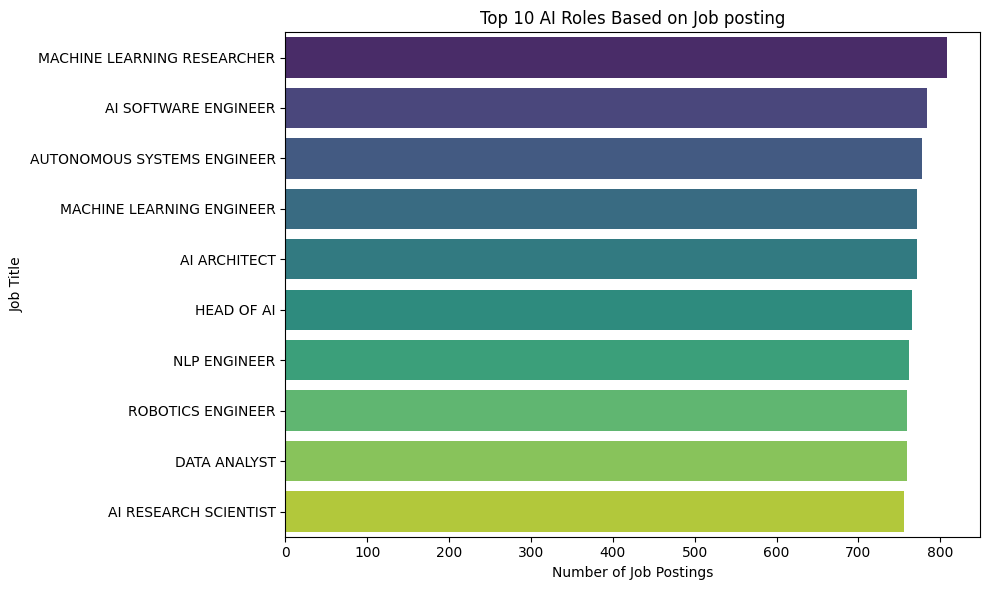

In [38]:

# Get top 10 most common job titles
top_roles = (
    df['job_title']
    .value_counts()
    .head(10)
    .reset_index(name='postings')
    .rename(columns={'index': 'job_title'})
)

# Plot
# Create a figure first
plt.figure(figsize=(10, 6))  # Optional: specify figure size
ax = sns.barplot(data=top_roles, y='job_title', x='postings', palette='viridis')
plt.title('Top 10 AI Roles Based on Job posting')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.tight_layout()

# Save the figure using plt.savefig() before showing it
plt.savefig('Top 10 Advertised AI Roles.png')  # Added file extension
plt.show()  # This should come after saving

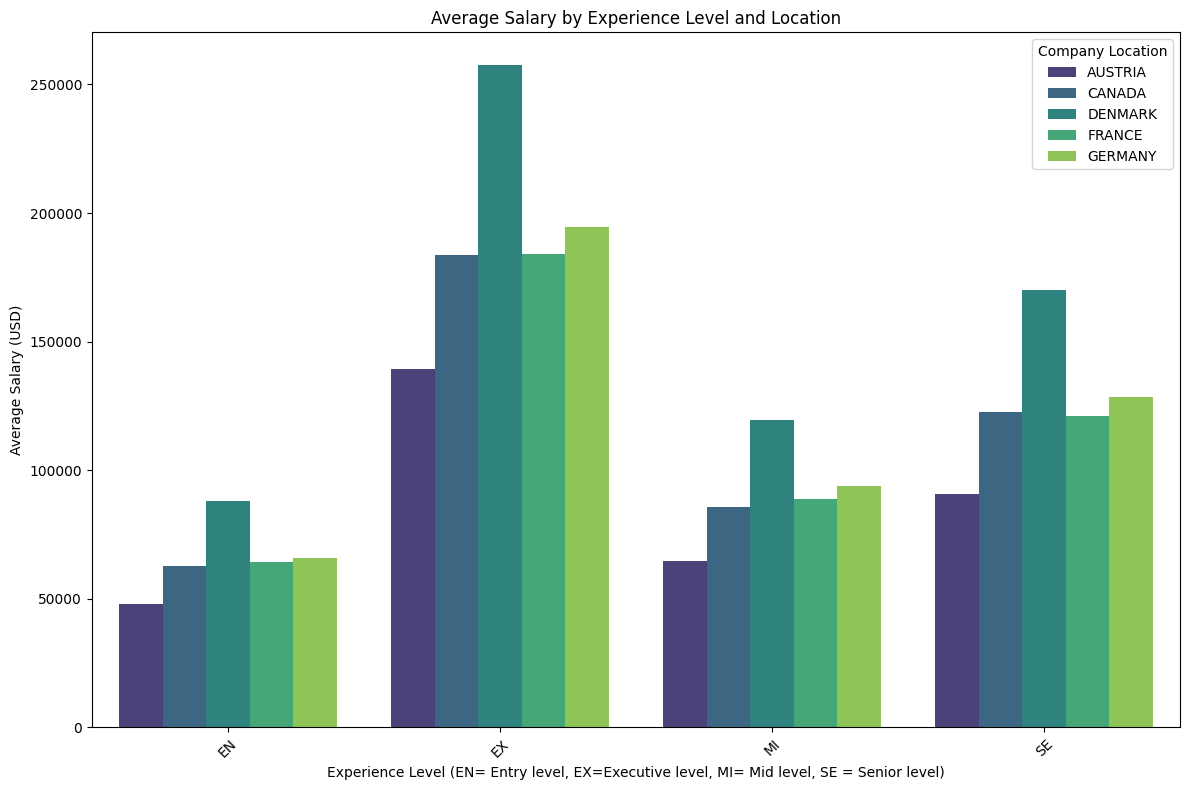

In [45]:
# Option 1: Bar chart showing average salary by experience level, grouped by top locations
# First, ensure salary_usd is numeric
df['salary_usd'] = pd.to_numeric(df['salary_usd'], errors='coerce')  # Convert to numeric, invalid values become NaN

# Calculate the average salary by experience level and location
salary_by_exp_loc = (
    df.groupby(['experience_level', 'company_location'])['salary_usd']
    .mean()
    .reset_index()
)

# Get top 10 locations by job count
top_locations = df['company_location'].value_counts().nlargest(5).index.tolist()

# Filter for only top locations
filtered_data = salary_by_exp_loc[salary_by_exp_loc['company_location'].isin(top_locations)]

# Create the plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=filtered_data, x='experience_level', y='salary_usd', hue='company_location', palette='viridis')
plt.title('Average Salary by Experience Level and Location')
# Fixed: Combine the label and description into a single string
plt.xlabel('Experience Level (EN= Entry level, EX=Executive level, MI= Mid level, SE = Senior level)')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.legend(title='Company Location')
plt.tight_layout()
plt.savefig('Salary_by_Experience_Location_Bar.png')
plt.show()

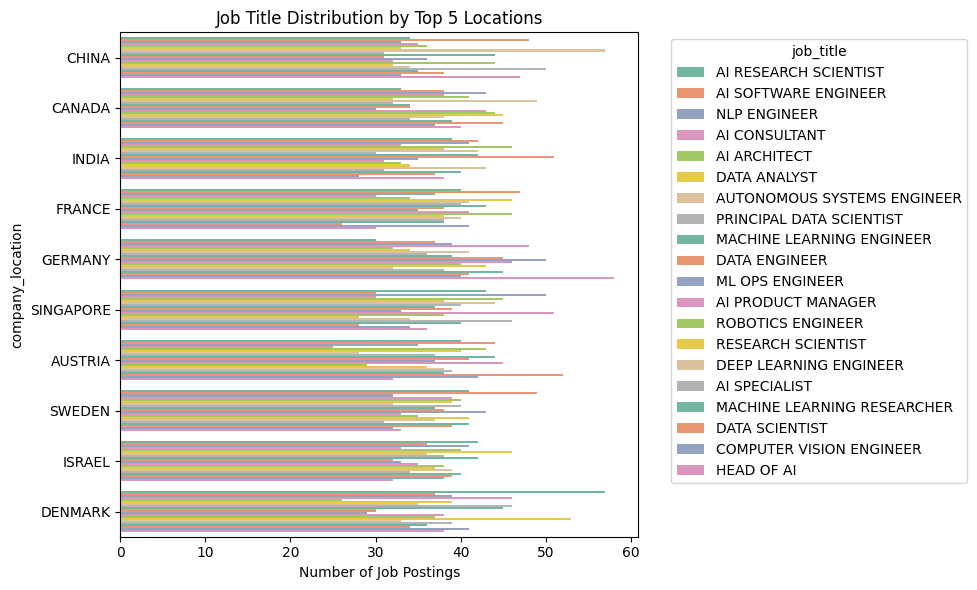

In [62]:
top_locations = df['company_location'].value_counts().head(10).index
filtered_df = df[df['company_location'].isin(top_locations)]

# Create a figure and axes explicitly
fig, ax = plt.subplots(figsize=(10, 6))  # You can adjust the figure size as needed

# Use the axes for the countplot
sns.countplot(data=filtered_df, y='company_location', hue='job_title', palette='Set2', ax=ax)
plt.title('Job Title Distribution by Top 5 Locations')
plt.xlabel('Number of Job Postings')
plt.ylabel('company_location')
plt.legend(title='job_title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Save the figure using the fig object, not the axes
fig.savefig("Top Countries by Job Title.png")  # Added .png extension for clarity

/var/folders/j0/mq_mr2hj0hl8xv4kfq895gk40000gn/T/ipykernel_15835/2177353055.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_salary_pivot.head(10).reset_index(),


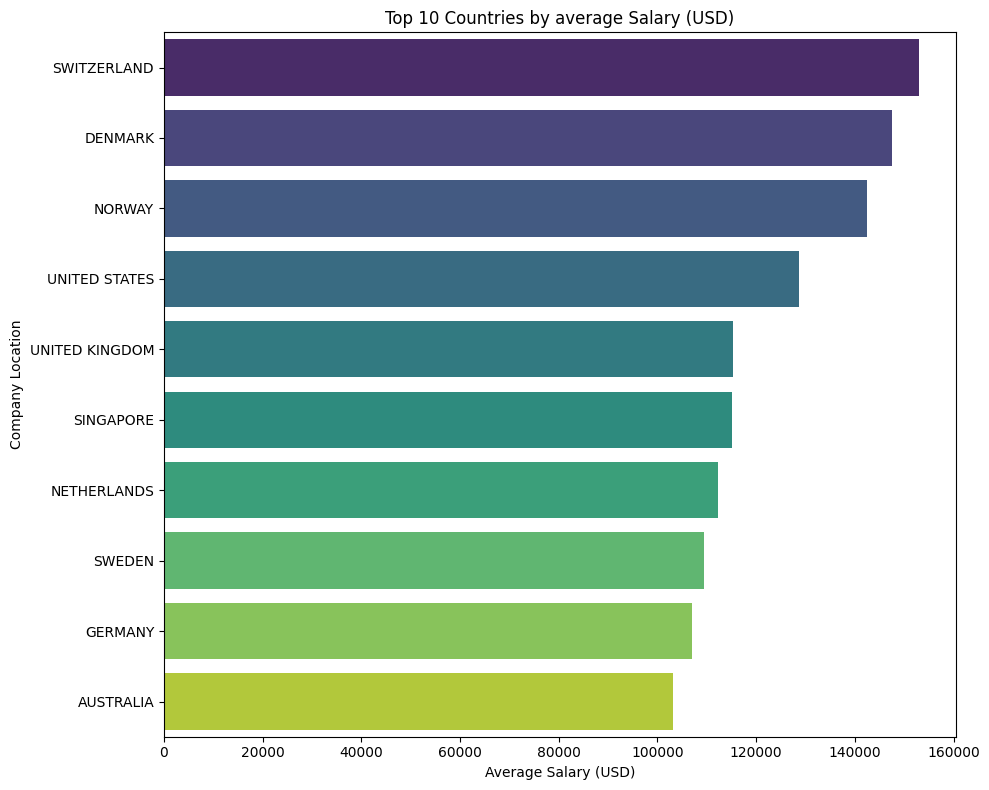

In [48]:


# Clean salary if not already done
df['salary_usd'] = pd.to_numeric(
    df['salary_usd'].astype(str).str.replace(r'[^\d.]', '', regex=True),
    errors='coerce'
)

# Pivot: Median salary per country
country_salary_pivot = pd.pivot_table(
    df,
    index='company_location',
    values='salary_usd',
    aggfunc='median'
).sort_values('salary_usd', ascending=False)

# Display top 20 countries
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=country_salary_pivot.head(10).reset_index(),
            y='company_location',
            x='salary_usd',
            palette='viridis')
plt.title("Top 10 Countries by average Salary (USD)")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Company Location")
plt.tight_layout()
plt.show()
fig.savefig("Countries by Salary")

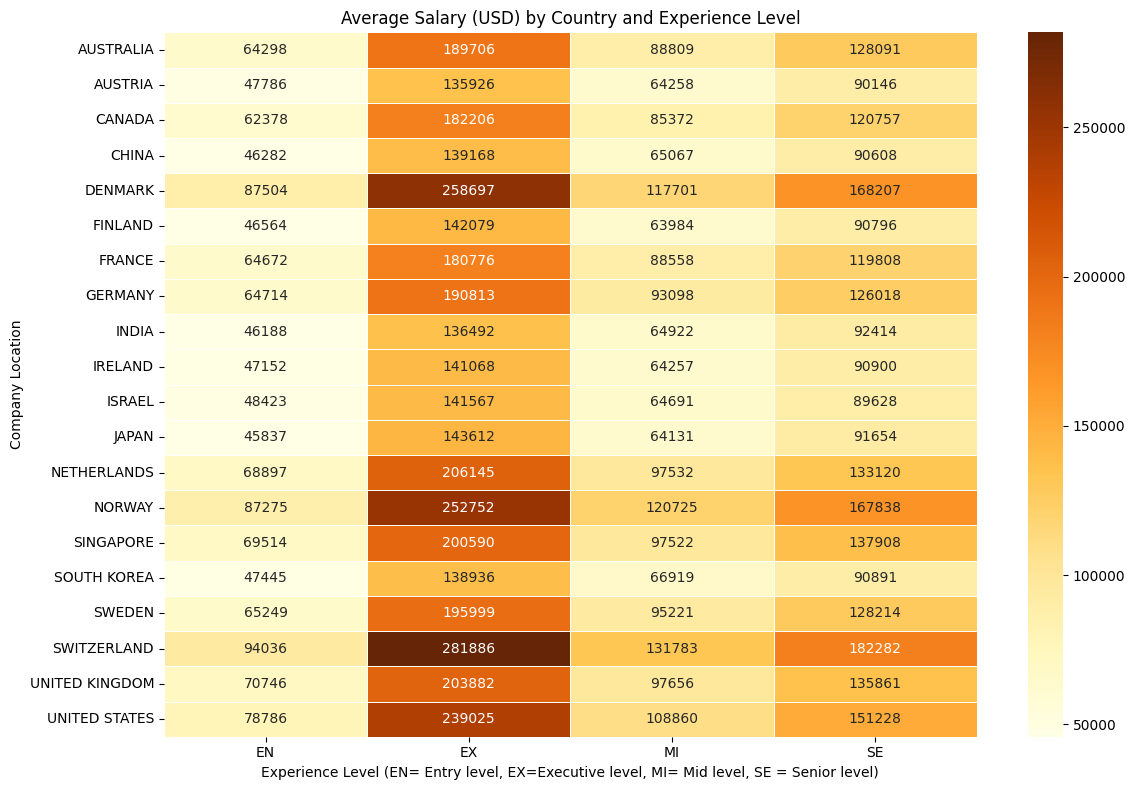

In [50]:
pivot_exp_country = pd.pivot_table(
    df,
    index='company_location',
    columns='experience_level',
    values='salary_usd',
    aggfunc='median'
).round(0)

# Heatmap
fig = plt.figure(figsize=(12, 8))
sns.heatmap(pivot_exp_country,
            annot=True,
            fmt=".0f",
            cmap="YlOrBr",
            linewidths=0.5)
plt.title("Average Salary (USD) by Country and Experience Level")
plt.xlabel(('Experience Level (EN= Entry level, EX=Executive level, MI= Mid level, SE = Senior level)'))
plt.ylabel("Company Location")
plt.tight_layout()
plt.show()
fig.savefig("Salary by Country and Experience")

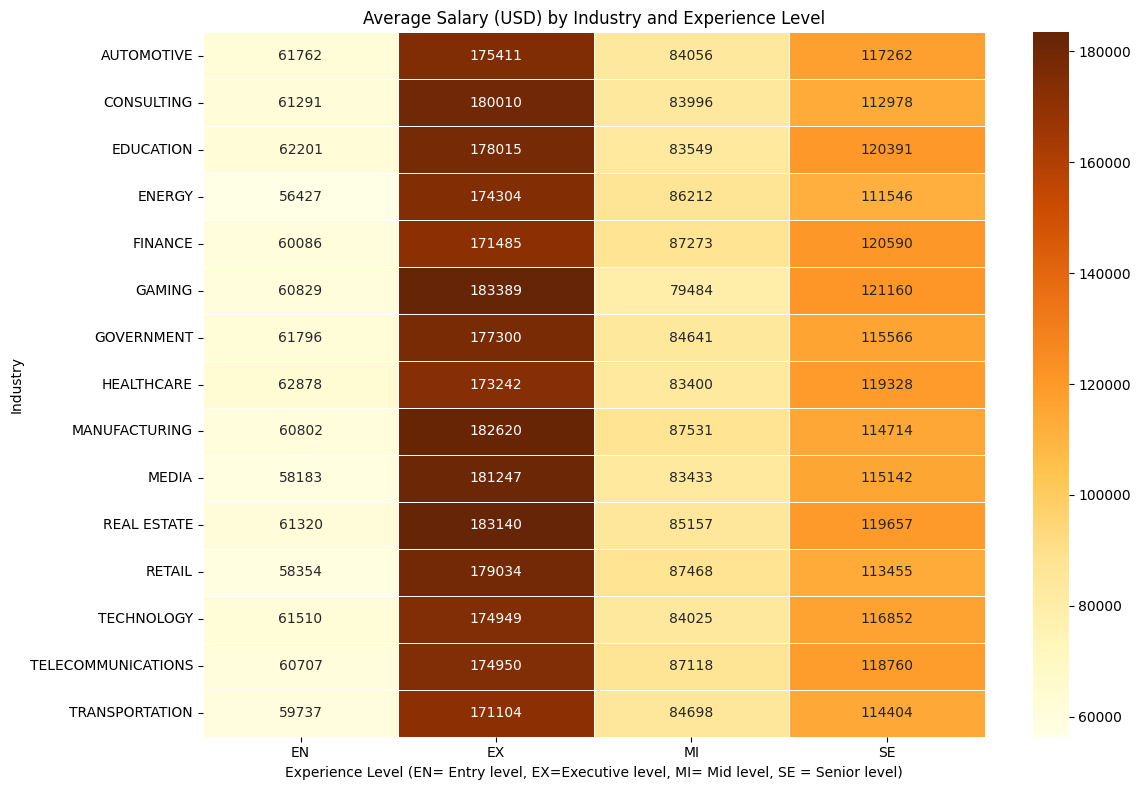

In [52]:
pivot_exp_country = pd.pivot_table(
    df,
    index='industry',  # Fixed typo: 'idustry' -> 'industry'
    columns='experience_level',
    values='salary_usd',
    aggfunc='median'
).round(0)

# Heatmap
fig = plt.figure(figsize=(12, 8))
sns.heatmap(pivot_exp_country,
            annot=True,
            fmt=".0f",
            cmap="YlOrBr",
            linewidths=0.5)
plt.title("Average Salary (USD) by Industry and Experience Level")
plt.xlabel(('Experience Level (EN= Entry level, EX=Executive level, MI= Mid level, SE = Senior level)'))
plt.ylabel("Industry")  # Also capitalized for consistency
plt.tight_layout()
plt.show()
fig.savefig("Median Salary by Industry and Expericence")

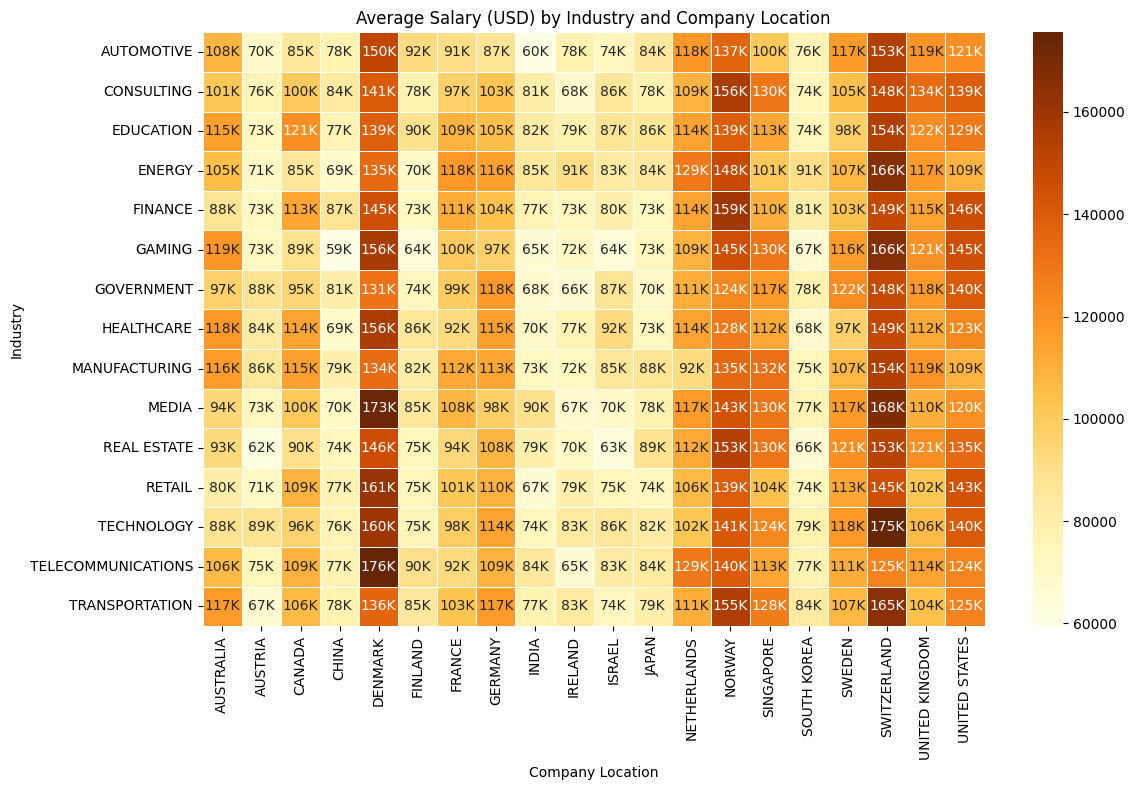

In [56]:
# Assuming pivot_exp_country is the pivot table
# Create a figure first
fig = plt.figure(figsize=(12, 8))

# Function to format salary values (e.g., 50000 -> 50K)
def format_salary(val):
    if val >= 1000000:
        return f'{val/1000000:.1f}M'  # Convert to millions
    elif val >= 1000:
        return f'{val/1000:.0f}K'     # Convert to thousands
    else:
        return f'{val:.0f}'           # Keep as is

# Create the heatmap with the original numerical data
heatmap = sns.heatmap(pivot_exp_country,  # Use the original numerical data
            annot=True,  # Show values in cells
            fmt="",      # Empty format to use custom formatter
            cmap="YlOrBr",
            linewidths=0.5)

# Apply the custom formatter to annotations
for t in heatmap.texts:
    # Get the text content (current value)
    val = float(t.get_text())
    # Replace with formatted version
    t.set_text(format_salary(val))

plt.title("Average Salary (USD) by Industry and Company Location")
plt.xlabel('Company Location')
plt.ylabel("Industry")
plt.tight_layout()

# Save the figure before showing it
fig.savefig("Average Salary by Industry and Location")

# Show the plot
plt.show()


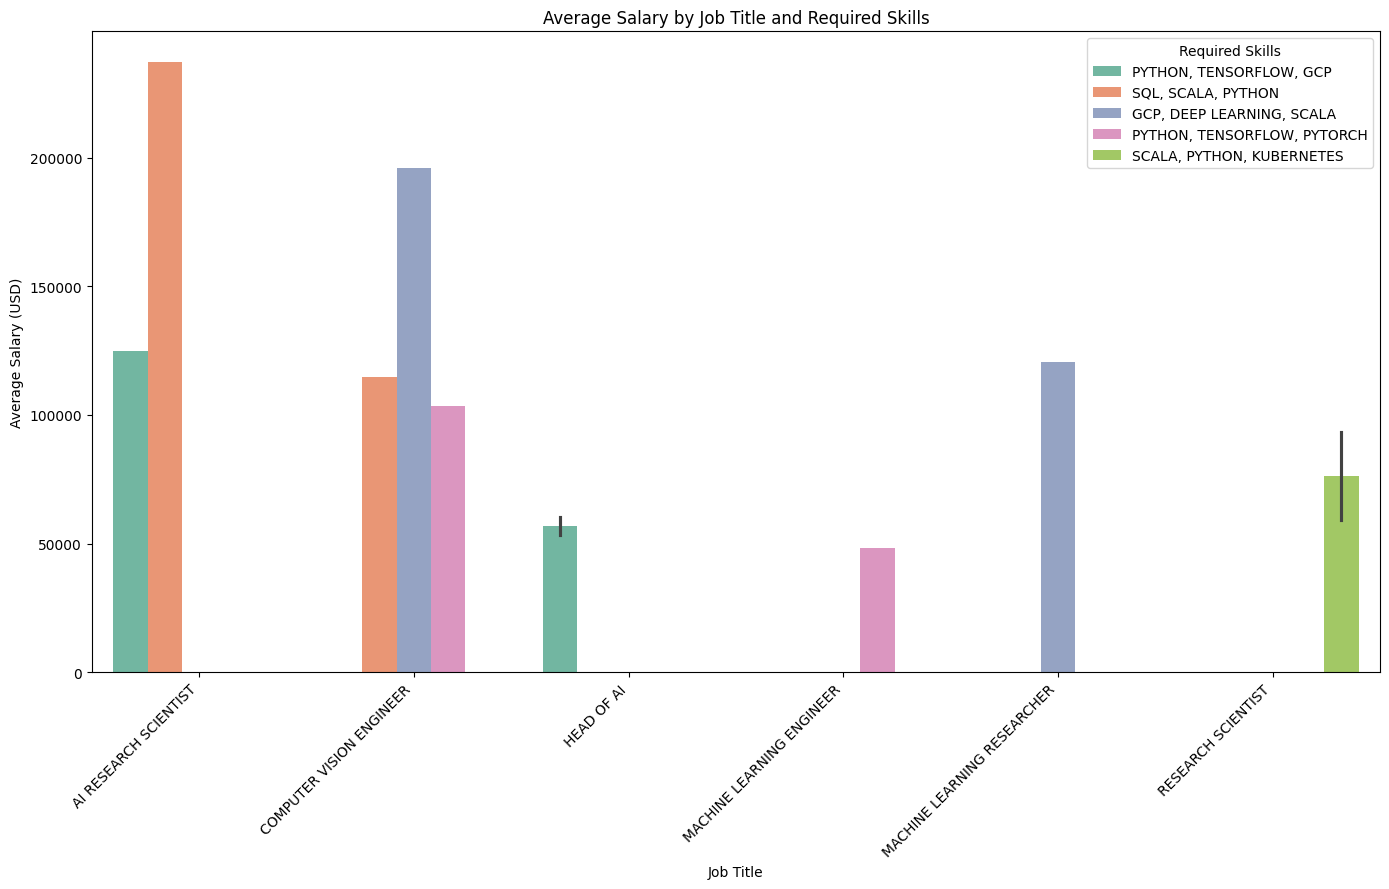

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure salary_usd is numeric
df['salary_usd'] = pd.to_numeric(df['salary_usd'], errors='coerce')

# Get top 5 locations by job count
top_locations = df['company_location'].value_counts().nlargest(5).index.tolist()

# Filter original df to only these top locations
df_filtered = df[df['company_location'].isin(top_locations)]

# Optional: Get top 10 job titles to keep plot manageable
top_job_titles = df_filtered['job_title'].value_counts().nlargest(10).index.tolist()
df_filtered = df_filtered[df_filtered['job_title'].isin(top_job_titles)]

# Optional: Get top 5 required skills
top_skills = df_filtered['required_skills'].value_counts().nlargest(5).index.tolist()
df_filtered = df_filtered[df_filtered['required_skills'].isin(top_skills)]

# Calculate average salary grouped by job_title, required_skills, and location
salary_grouped = (
    df_filtered.groupby(['job_title', 'required_skills', 'company_location'])['salary_usd']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(14, 9))
ax = sns.barplot(
    data=salary_grouped,
    x='job_title',
    y='salary_usd',
    hue='required_skills',
    palette='Set2'
)
plt.title('Average Salary by Job Title and Required Skills')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Required Skills')
plt.tight_layout()
plt.savefig('Salary_by_JobTitle_Skills.png')
plt.show()


In [18]:
(sorted(df['required_skills'].dropna().unique()))

['AWS, AZURE, GCP, DOCKER',
 'AWS, AZURE, GIT',
 'AWS, AZURE, GIT, DEEP LEARNING, LINUX',
 'AWS, AZURE, GIT, SQL, COMPUTER VISION',
 'AWS, AZURE, HADOOP',
 'AWS, AZURE, JAVA',
 'AWS, AZURE, JAVA, STATISTICS',
 'AWS, AZURE, LINUX, GIT',
 'AWS, AZURE, MLOPS',
 'AWS, AZURE, NLP, DOCKER',
 'AWS, AZURE, NLP, PYTHON, JAVA',
 'AWS, AZURE, PYTORCH, SPARK',
 'AWS, AZURE, R, SQL, DATA VISUALIZATION',
 'AWS, AZURE, SPARK, GIT',
 'AWS, AZURE, SQL, SPARK',
 'AWS, AZURE, TENSORFLOW',
 'AWS, COMPUTER VISION, AZURE, MLOPS',
 'AWS, COMPUTER VISION, GCP, PYTHON, TENSORFLOW',
 'AWS, COMPUTER VISION, JAVA',
 'AWS, COMPUTER VISION, KUBERNETES',
 'AWS, COMPUTER VISION, PYTHON',
 'AWS, COMPUTER VISION, PYTORCH',
 'AWS, COMPUTER VISION, TENSORFLOW, R, GIT',
 'AWS, DATA VISUALIZATION, AZURE, NLP',
 'AWS, DATA VISUALIZATION, DEEP LEARNING',
 'AWS, DATA VISUALIZATION, DOCKER, PYTHON, TENSORFLOW',
 'AWS, DATA VISUALIZATION, GCP',
 'AWS, DATA VISUALIZATION, HADOOP',
 'AWS, DATA VISUALIZATION, MATHEMATICS',
 'AWS, 

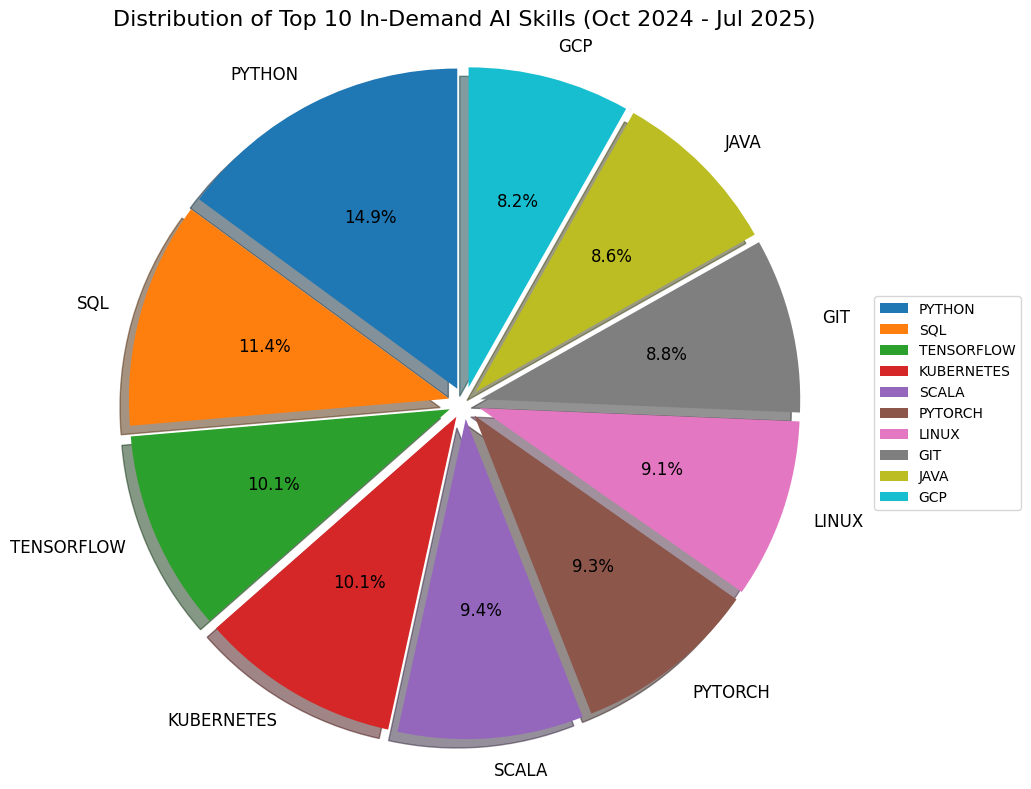

In [74]:
# Using the previously processed data to create a pie chart of top skills

# Get the total counts for each top skill across all job titles
skill_totals = exploded_df[exploded_df['skills'].isin(top_skills)]['skills'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(skill_totals, labels=skill_totals.index, autopct='%1.1f%%', 
        startangle=90, shadow=True, explode=[0.05] * len(skill_totals),
        textprops={'fontsize': 12})

# Add a title
plt.title('Distribution of Top 10 In-Demand AI Skills (Oct 2024 - Jul 2025)', fontsize=16)

# Add a legend with percentages
plt.legend(skill_totals.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Ensure the pie chart is a circle
plt.axis('equal')

# Apply tight layout
plt.tight_layout()

# Save the figure BEFORE showing it
plt.savefig("Top_Skills_Distribution_Pie_Chart.png", bbox_inches='tight', dpi=300)

# Now show the plot (after saving)
plt.show()

In [77]:
(sorted(df['job_title'].dropna().unique()))

['AI ARCHITECT',
 'AI CONSULTANT',
 'AI PRODUCT MANAGER',
 'AI RESEARCH SCIENTIST',
 'AI SOFTWARE ENGINEER',
 'AI SPECIALIST',
 'AUTONOMOUS SYSTEMS ENGINEER',
 'COMPUTER VISION ENGINEER',
 'DATA ANALYST',
 'DATA ENGINEER',
 'DATA SCIENTIST',
 'DEEP LEARNING ENGINEER',
 'HEAD OF AI',
 'MACHINE LEARNING ENGINEER',
 'MACHINE LEARNING RESEARCHER',
 'ML OPS ENGINEER',
 'NLP ENGINEER',
 'PRINCIPAL DATA SCIENTIST',
 'RESEARCH SCIENTIST',
 'ROBOTICS ENGINEER']